### 📁 Load Job Data
Load the job listings dataset and preview the first few rows.

In [3]:
import pandas as pd

# Load data
file_path = "C:/Users/as/Desktop/Projects/Job_Tracker_Salary_Analyzer/input_files/jobs_data.csv"
df = pd.read_csv(file_path)

# Show the first few rows
df.head()

,Job Title,Company,Location,Salary,Experience Required,Skills,Date Posted
0,Data Analyst,ABC Corp,Delhi,"₹6,00,000",1-2 years,"SQL, Excel",2025-06-01
1,Business Analyst,XYZ Ltd,Bangalore,"₹7,50,000",2-3 years,"Excel, Tableau",2025-06-03
2,Data Scientist,DataCo,Mumbai,"₹12,00,000",3-5 years,"Python, ML, SQL",2025-06-04
3,Python Developer,TechSoft,Remote,"₹8,00,000",1-2 years,"Python, Django",2025-06-06
4,Data Engineer,Engineeria,Hyderabad,"₹10,50,000",2-4 years,"SQL, Python, Spark",2025-06-07


### 💰 Clean the Salary Column
Remove currency symbols and convert salary to integer format.

In [5]:
# Remove ₹ and commas, convert to int
df['Salary'] = df['Salary'].replace('[₹,]', '', regex=True).astype(int)
df.head()

,Job Title,Company,Location,Salary,Experience Required,Skills,Date Posted
0,Data Analyst,ABC Corp,Delhi,600000,1-2 years,"SQL, Excel",2025-06-01
1,Business Analyst,XYZ Ltd,Bangalore,750000,2-3 years,"Excel, Tableau",2025-06-03
2,Data Scientist,DataCo,Mumbai,1200000,3-5 years,"Python, ML, SQL",2025-06-04
3,Python Developer,TechSoft,Remote,800000,1-2 years,"Python, Django",2025-06-06
4,Data Engineer,Engineeria,Hyderabad,1050000,2-4 years,"SQL, Python, Spark",2025-06-07


### 👩‍💼 Extract Minimum and Maximum Experience
Split the 'Experience Required' column into separate numeric columns.

In [7]:
# Split the experience column into min and max
df[['Min_Exp', 'Max_Exp']] = df['Experience Required'].str.extract(r'(\d+)-(\d+)').astype(float)
df.head()

,Job Title,Company,Location,Salary,Experience Required,Skills,Date Posted,Min_Exp,Max_Exp
0,Data Analyst,ABC Corp,Delhi,600000,1-2 years,"SQL, Excel",2025-06-01,1.0,2.0
1,Business Analyst,XYZ Ltd,Bangalore,750000,2-3 years,"Excel, Tableau",2025-06-03,2.0,3.0
2,Data Scientist,DataCo,Mumbai,1200000,3-5 years,"Python, ML, SQL",2025-06-04,3.0,5.0
3,Python Developer,TechSoft,Remote,800000,1-2 years,"Python, Django",2025-06-06,1.0,2.0
4,Data Engineer,Engineeria,Hyderabad,1050000,2-4 years,"SQL, Python, Spark",2025-06-07,2.0,4.0


### 🛠️ Convert Skills to List Format
Split skills string into a list for each row.

In [9]:
# Convert comma-separated skills into list
df['Skills'] = df['Skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])
df.head()

,Job Title,Company,Location,Salary,Experience Required,Skills,Date Posted,Min_Exp,Max_Exp
0,Data Analyst,ABC Corp,Delhi,600000,1-2 years,"[SQL, Excel]",2025-06-01,1.0,2.0
1,Business Analyst,XYZ Ltd,Bangalore,750000,2-3 years,"[Excel, Tableau]",2025-06-03,2.0,3.0
2,Data Scientist,DataCo,Mumbai,1200000,3-5 years,"[Python, ML, SQL]",2025-06-04,3.0,5.0
3,Python Developer,TechSoft,Remote,800000,1-2 years,"[Python, Django]",2025-06-06,1.0,2.0
4,Data Engineer,Engineeria,Hyderabad,1050000,2-4 years,"[SQL, Python, Spark]",2025-06-07,2.0,4.0


### 📌 Most Common Job Titles
Identify which job titles appear most frequently.

In [11]:
df['Job Title'].value_counts()

Job Title
Data Analyst        1
Business Analyst    1
Data Scientist      1
Python Developer    1
Data Engineer       1
Name: count, dtype: int64

### 💸 Average Salary by Job Title
Find the average salary offered for each job title.

In [13]:
df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)

Job Title
Data Scientist      1200000.0
Data Engineer       1050000.0
Python Developer     800000.0
Business Analyst     750000.0
Data Analyst         600000.0
Name: Salary, dtype: float64

### 📊 Average Experience Required by Role
Check average min and max experience for each job role.

In [15]:
df.groupby('Job Title')[['Min_Exp', 'Max_Exp']].mean()

,Min_Exp,Max_Exp
Job Title,,
Business Analyst,2.0,3.0
Data Analyst,1.0,2.0
Data Engineer,2.0,4.0
Data Scientist,3.0,5.0
Python Developer,1.0,2.0


### 🧠 Most In-Demand Skills
List the most frequently mentioned skills in all job listings.

In [17]:
from collections import Counter

# Flatten skill lists
all_skills = sum(df['Skills'], [])
skill_counts = Counter(all_skills)

# Display top skills
pd.DataFrame(skill_counts.most_common(), columns=['Skill', 'Count'])

,Skill,Count
0,SQL,3
1,Python,3
2,Excel,2
3,Tableau,1
4,ML,1
5,Django,1
6,Spark,1


### 📈 Top 5 In-Demand Skills (Bar Chart)
Visualize the top 5 skills in a bar chart.

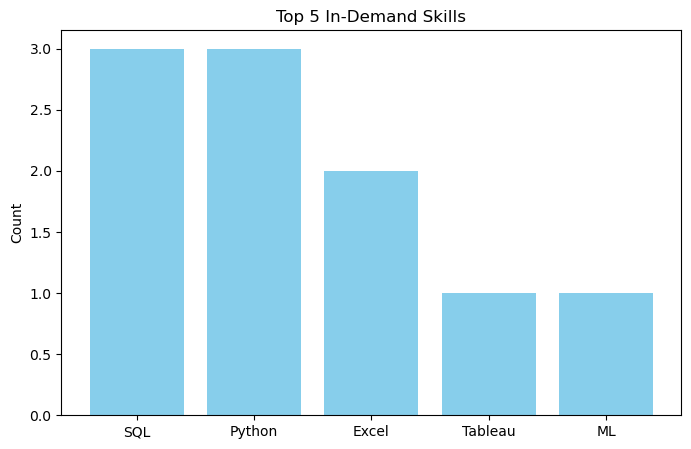

In [19]:
import matplotlib.pyplot as plt

# Top 5 skills
top_skills = pd.DataFrame(skill_counts.most_common(5), columns=['Skill', 'Count'])

plt.figure(figsize=(8,5))
plt.bar(top_skills['Skill'], top_skills['Count'], color='skyblue')
plt.title('Top 5 In-Demand Skills')
plt.ylabel('Count')
plt.show()

### 💾 Export Cleaned Job Data
Save the cleaned dataset for future use or visualization.

In [36]:
# Corrected path to match your folder
output_path = "C:/Users/as/Desktop/Projects/Job_Tracker_Salary_Analyzer/cleaned_data/cleaned_jobs_data.csv"

# Create the folder if it doesn't exist
import os
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the file
df.to_csv(output_path, index=False)
print("✅ Cleaned job data saved successfully at:", output_path)

✅ Cleaned job data saved successfully at: C:/Users/as/Desktop/Projects/Job_Tracker_Salary_Analyzer/cleaned_data/cleaned_jobs_data.csv


### 📊 Export Summary Tables to Analysis Folder

In [41]:
# Safely extract all skills from the column
from collections import Counter

# Filter rows where Skills is a string
valid_skills = df['Skills'].dropna().apply(lambda x: x if isinstance(x, str) else '')

# Split and flatten the list
skill_counter = Counter([skill.strip() 
                         for skills in valid_skills 
                         for skill in skills.split(',') if skill.strip() != ''])

# Create dataframe and save
skill_df = pd.DataFrame(skill_counter.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
skill_df.to_csv("C:/Users/as/Desktop/Projects/Job_Tracker_Salary_Analyzer/analysis/in_demand_skills.csv", index=False)

print("✅ In-demand skills saved successfully.")

✅ In-demand skills saved successfully.
